Loading Library

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# enable inline plots in the notebook
%matplotlib inline



Loading Data

In [ ]:
loan_df = pd.read_csv('/content/DS2_C5_S1_Loan_Data_Concept (7).csv')
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
# Datatypes of all columns
print(loan_df.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


Data Preparation

In [ ]:
# All columns
loan_df_c=loan_df
columns=loan_df_c.columns
columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
# structure of dataset
print(loan_df_c.shape)

(9578, 14)


In [ ]:
# summary of dataset
loan_df_c.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
# count of each label in categorical column
loan_df_c.purpose.value_counts()

,count
purpose,
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


In [ ]:
loan_df_c['credit.policy'] .value_counts()
loan_df_c['not.fully.paid'] .value_counts()

,count
not.fully.paid,
0,8045
1,1533


Missing value treatment

In [ ]:
# checking for null value in each column
print(loan_df_c.isnull() .sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


Feature Engineering

In [ ]:
# converting numeric labeled column into categorical column
loan_df_c['credit.policy']=loan_df_c['credit.policy'].astype('category')
loan_df_c['purpose']=loan_df_c['purpose'].astype('category')
print(loan_df.head())
print(loan_df.dtypes)

  credit.policy             purpose  int.rate  installment  log.annual.inc  \
0             1  debt_consolidation    0.1189       829.10       11.350407   
1             1         credit_card    0.1071       228.22       11.082143   
2             1  debt_consolidation    0.1357       366.86       10.373491   
3             1  debt_consolidation    0.1008       162.34       11.350407   
4             1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0         

In [ ]:
# Using LabelEncoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
loan_df_c['purpose_encode']= label_encoder.fit_transform(loan_df_c['purpose'])

loan_df_c['purpose_encode'].unique()
#print(loan_df.head())

array([2, 1, 0, 4, 6, 5, 3])

In [ ]:
#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
loan_df_c['not.fully.paid_encode']= label_encoder.fit_transform(loan_df_c['not.fully.paid'])

loan_df_c['not.fully.paid_encode'].unique()
loan_df_c['not.fully.paid_encode']=loan_df_c['not.fully.paid_encode'].astype('category')
#print(loan_df.head())


Feature Scaling

In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
  numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
  new_loan_df = loan_df_c.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
      scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(new_loan_df.to_numpy()),columns=new_loan_df.columns)
  return df_scaled

In [ ]:
#scaling the data using minmax Scaling process
scale = 'minmax'#standard
loan_df_scaled=feature_scale(scale)
loan_df_scaled

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encode
0,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0,0.0,0.333333
1,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0,0.0,0.166667
2,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0,0.0,0.333333
3,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0,0.0,0.333333
4,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0.550512,0.355977,0.663709,0.346796,0.279070,0.589602,0.178383,0.689916,0.060606,0.000000,0.0,1.0,0.000000
9574,0.417519,0.261804,0.514888,0.007009,0.511628,0.240596,0.000152,0.009244,0.151515,0.000000,0.0,1.0,0.000000
9575,0.301151,0.088851,0.436785,0.436916,0.348837,0.187337,0.008312,0.696639,0.242424,0.000000,0.0,1.0,0.333333
9576,0.639386,0.363354,0.468750,0.640187,0.372093,0.092838,0.000000,0.026891,0.151515,0.000000,0.0,1.0,0.666667


Feature Selection

In [ ]:
# Finding correlation among numerical features, based on their strong relation we can choose the import
# atnt features
corr=loan_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_encode
int.rate,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,0.117067
installment,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.154827
log.annual.inc,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.088958
dti,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.053279
fico,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.057337
days.with.cr.line,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.047526
revol.bal,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.042364
revol.util,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.062947
inq.last.6mths,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.037516
delinq.2yrs,0.156079,-0.004368,0.029203,-0.021792,-0.216340,0.081374,-0.033243,-0.042740,0.021245,1.000000,0.009184,0.008881,-0.011701


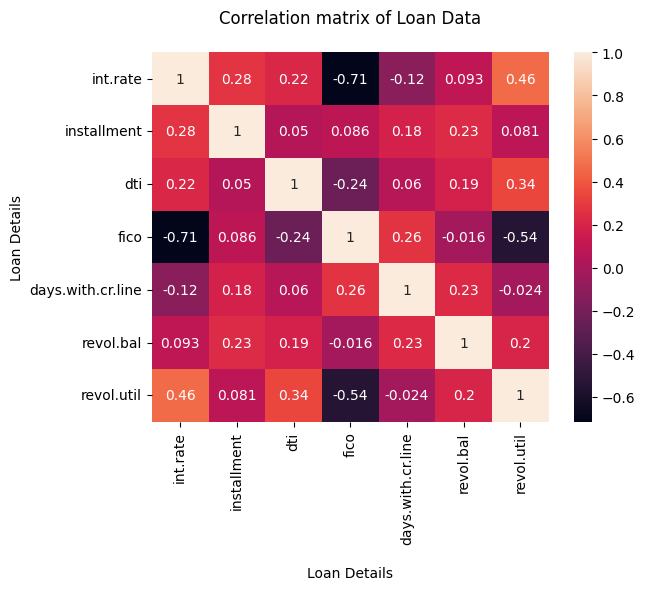

In [ ]:
new_df_scaled=loan_df_scaled[['int.rate','installment', 'dti','fico', 'days.with.cr.line', 'revol.bal','revol.util']]
hm = sns.heatmap(new_df_scaled.corr(), annot = True)
hm.set(xlabel='\nLoan Details', ylabel='Loan Details', title = "Correlation matrix of Loan Data\n")
plt.show()

Splitting Data

In [ ]:
# splitting dataframe by row index
loan_df_c=loan_df
train_num=int(9578*0.7)
loan_df_train = loan_df_c.iloc[:train_num,:]
loan_df_test = loan_df_c.iloc[(train_num+1):,:]
print("Shape of new dataframes - {} , {}".format(loan_df_train.shape, loan_df_test.shape))

Shape of new dataframes - (6704, 16) , (2873, 16)


In [ ]:
# splitting dataframe using train_test_split() built in method
y = loan_df_c['credit.policy']
x = loan_df_c
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
print("Shape of new dataframe - {} , {}".format(x_train.shape, x_test.shape))

Shape of new dataframe - (6704, 16) , (2874, 16)


Data Visualization

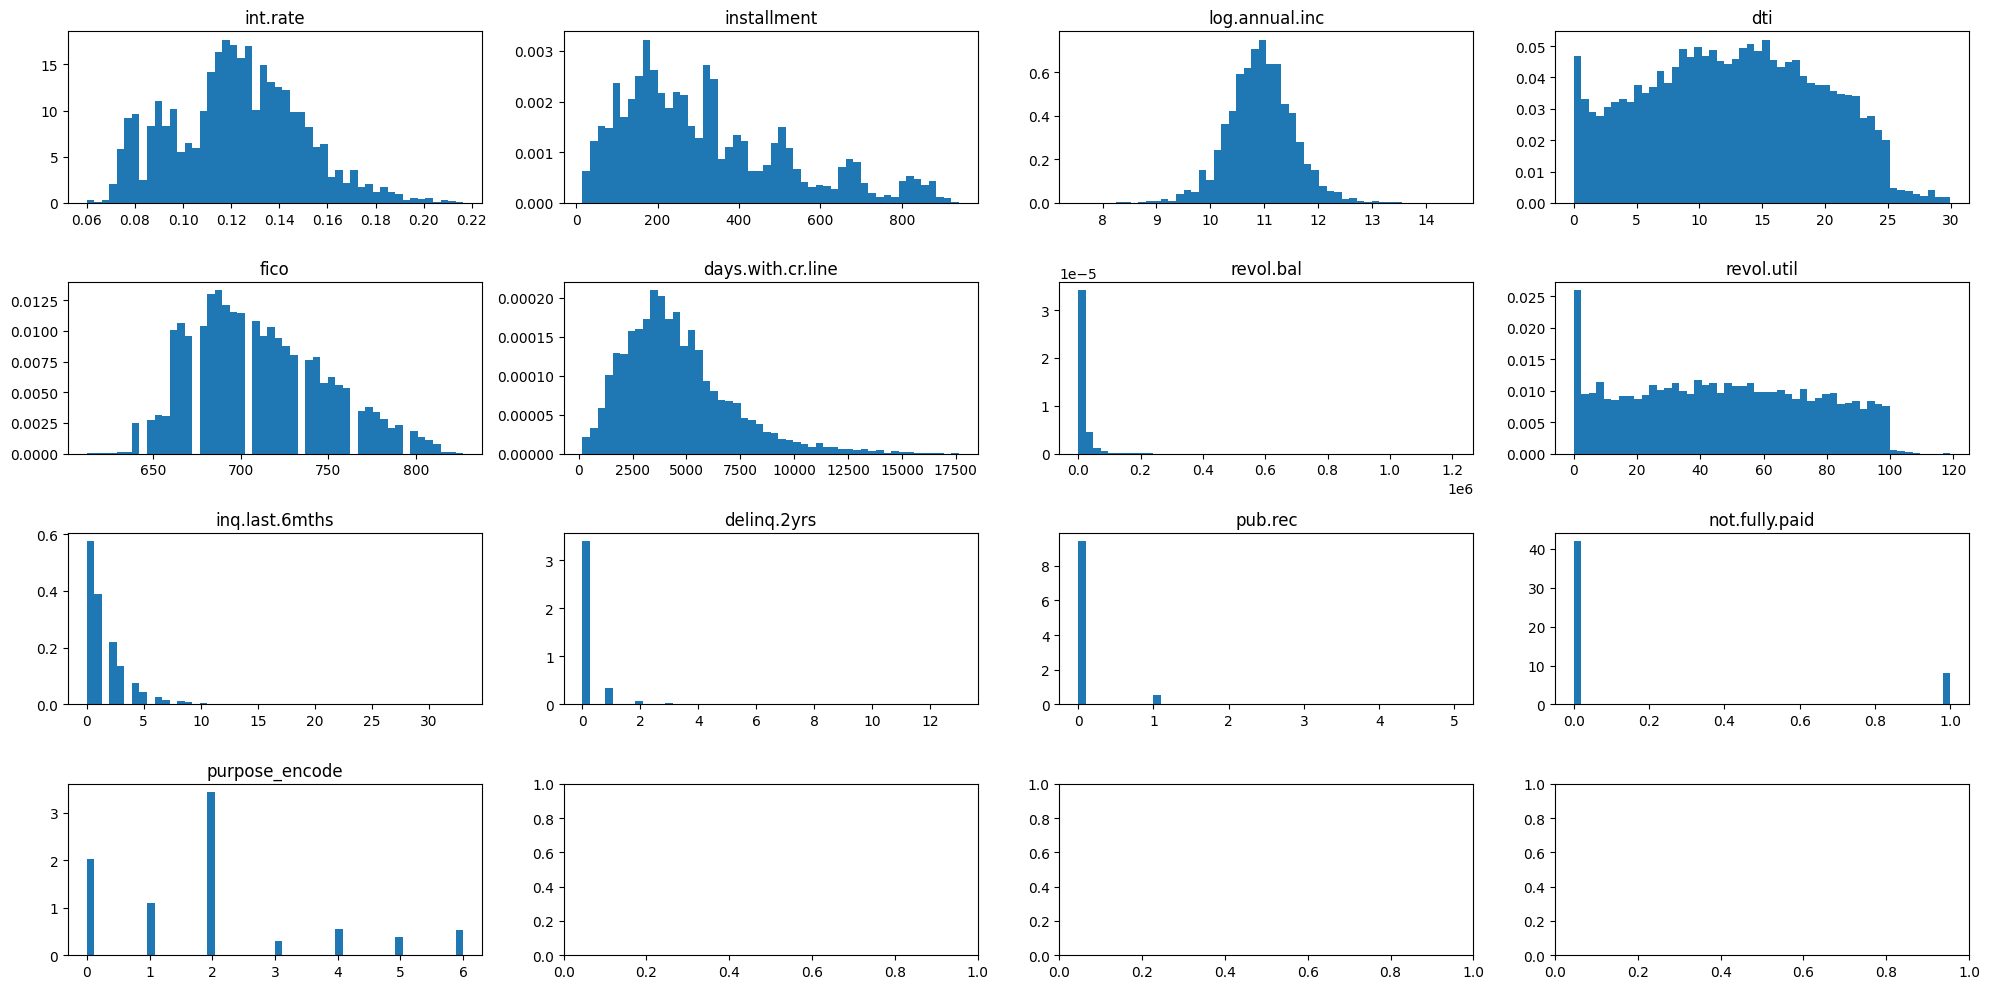

In [ ]:
 # Histogram of all numerical features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_loan_df = loan_df_c.select_dtypes(include=numerics)
numeric_cols=new_loan_df.columns
num_cols=4
n_bins = 50
# compute number of rows for plot
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_loan_df[col],bins=n_bins,density=True)
    ax.set_title(col)
plt.show()


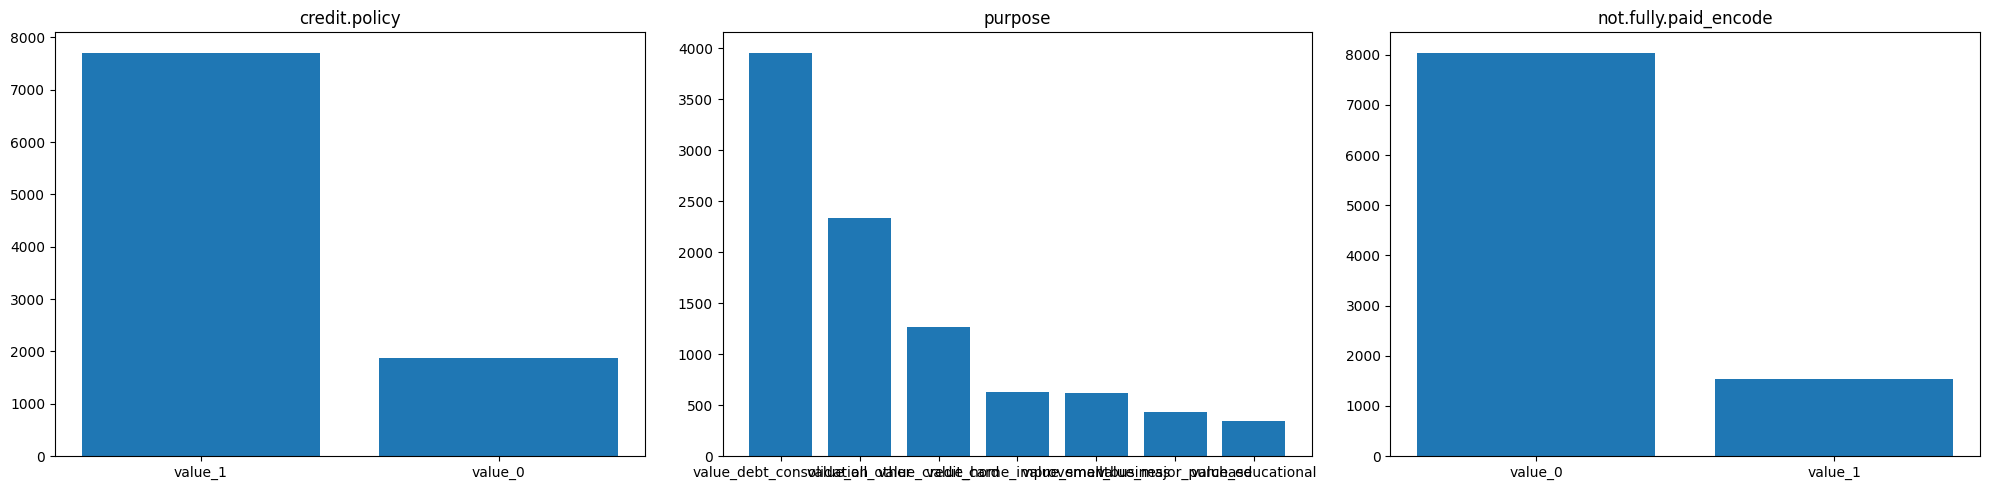

In [ ]:
# Histogram of all categorical features
num_cols = 3
cat_loan_df = loan_df_c.select_dtypes('category')
categorical_cols=cat_loan_df.columns
# compute number of rows for plot
num_rows= int(len(categorical_cols)/num_cols)
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,5))
# plotting the numerical columns
for col, ax in zip(categorical_cols,axs.flatten()[:len(categorical_cols)]):
 stats = cat_loan_df[col].value_counts()
 values = list(stats)
 names = list(map(lambda x : ''.join(('value_',str(x))),list(stats.index)))
 ax.bar(names,values)
 ax.set_title(col)

plt.show()

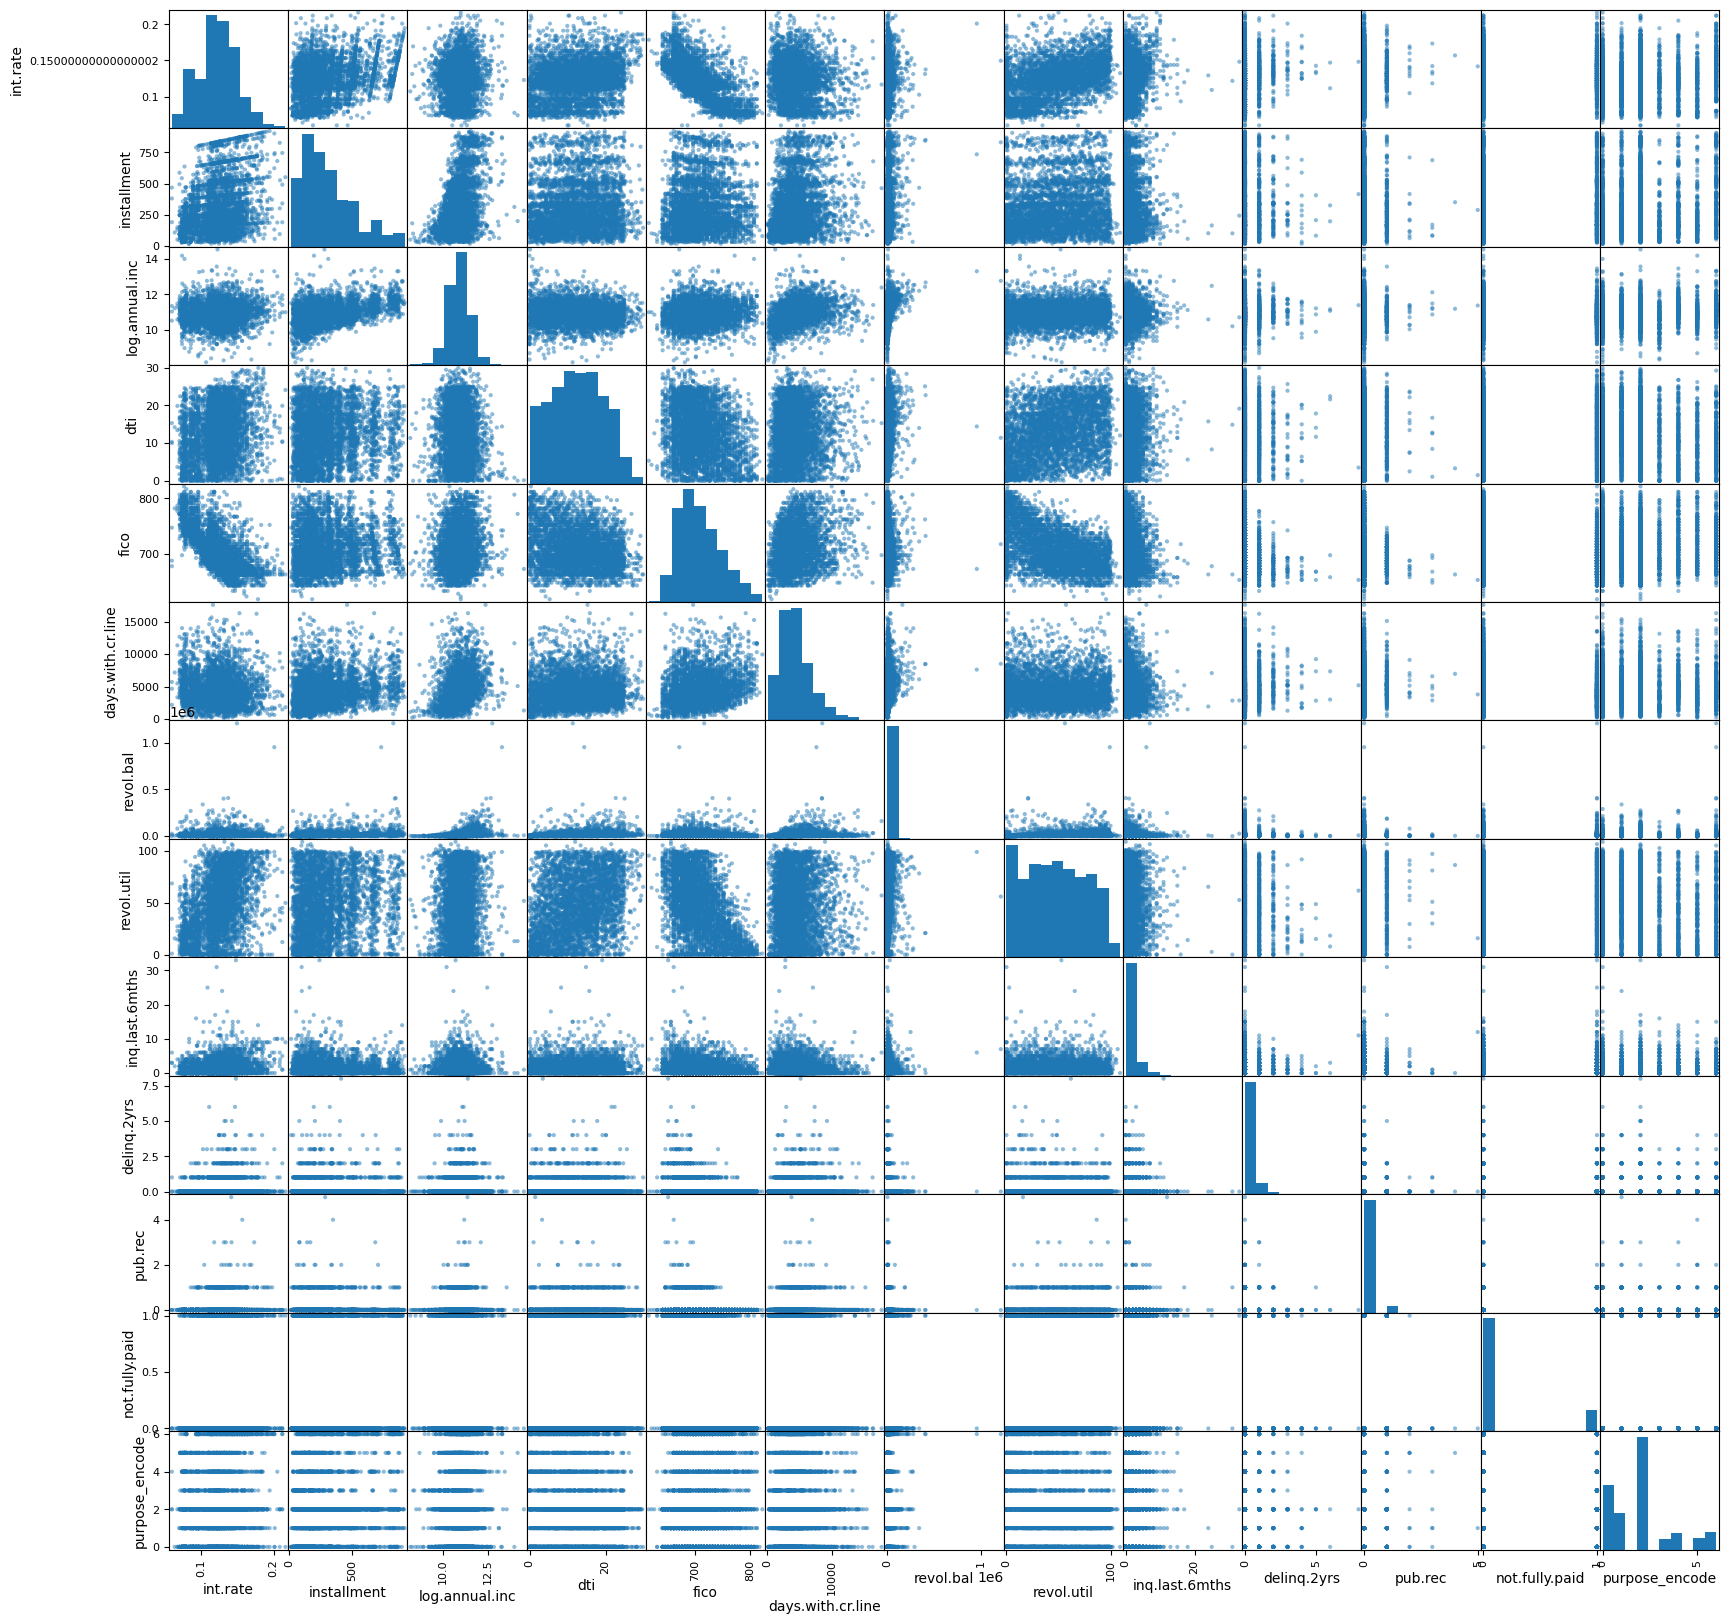

In [ ]:
# Scatter Matrix plot of all columns
pd.plotting.scatter_matrix(loan_df_c[numeric_cols].sample(4000),figsize=(20,20))
plt.show()

['debt_consolidation', 'credit_card', 'all_other', 'home_improvement', 'small_business', 'major_purchase', 'educational']
Categories (7, object): ['all_other', 'credit_card', 'debt_consolidation', 'educational',
                         'home_improvement', 'major_purchase', 'small_business']


<ipython-input-26-71ae92a951d2>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_df_c.groupby(loan_df_c['purpose']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)


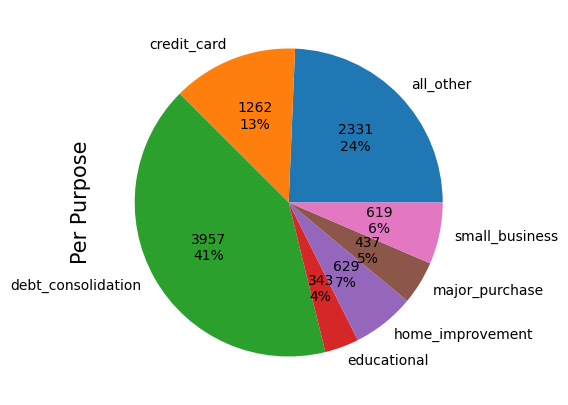

In [ ]:
 # Pie charts of categorical features
labels=loan_df_c['purpose'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(loan_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
#plt.pie(loan_df_c['purpose_encode'])
loan_df_c.groupby(loan_df_c['purpose']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Per Purpose', size=15)
# show plot
plt.show()


<ipython-input-27-43399ff5f7af>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_df_c.groupby(loan_df_c['credit.policy']).size().plot(kind='pie', autopct=label_function, textprops


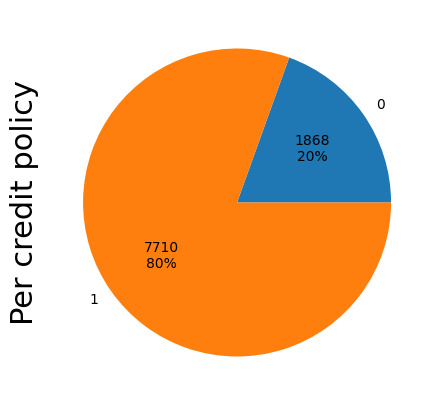

In [ ]:
def label_function(val):
 return f'{val / 100 * len(loan_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
#plt.pie(loan_df_c['purpose_encode'])
loan_df_c.groupby(loan_df_c['credit.policy']).size().plot(kind='pie', autopct=label_function, textprops
={'fontsize': 10}, ax=ax)
ax.set_ylabel('Per credit policy', size=22)
# show plot
plt.show()

<ipython-input-29-e61c7baa2285>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_df_c.groupby(loan_df_c['not.fully.paid_encode']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)


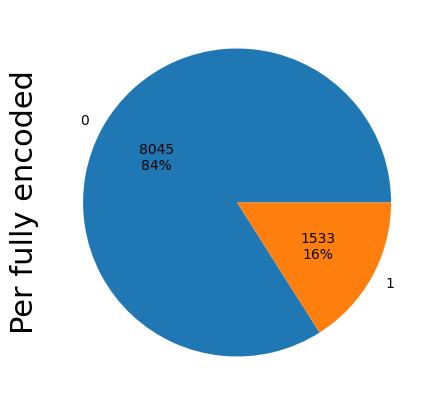

In [ ]:
def label_function(val):
 return f'{val / 100 * len(loan_df_c):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))
loan_df_c.groupby(loan_df_c['not.fully.paid_encode']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Per fully encoded', size=22)
# show plot
plt.show()

CONTINUE FOR MODEL AND PREDICTION

In [ ]:
# importing necessary library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data
loan_df = pd.read_csv('/content/DS2_C5_S1_Loan_Data_Concept (7).csv')

In [ ]:
# Convert relevant columns to categorical
loan_df['credit.policy'] = loan_df['credit.policy'].astype('category')
loan_df['purpose'] = loan_df['purpose'].astype('category')

In [ ]:
# Select features and target
x = loan_df[['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc', 'fico',
             'days.with.cr.line', 'revol.bal', 'revol.util', 'pub.rec']]
y = loan_df['not.fully.paid']

In [ ]:
# Convert categorical variables to dummy variables
x = pd.get_dummies(x, drop_first=True)

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Feature Scaling (optional but can help with some algorithms)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

In [ ]:
# Compare predictions with actual values
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
print(f'Accuracy; {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy; 0.84
Confusion Matrix:
[[2392   16]
 [ 456   10]]
Classification Report:
{'0': {'precision': 0.8398876404494382, 'recall': 0.9933554817275747, 'f1-score': 0.9101978691019788, 'support': 2408.0}, '1': {'precision': 0.38461538461538464, 'recall': 0.02145922746781116, 'f1-score': 0.04065040650406505, 'support': 466.0}, 'accuracy': 0.8357689631176062, 'macro avg': {'precision': 0.6122515125324114, 'recall': 0.5074073545976929, 'f1-score': 0.4754241378030219, 'support': 2874.0}, 'weighted avg': {'precision': 0.7660682698096786, 'recall': 0.8357689631176062, 'f1-score': 0.7692065268714194, 'support': 2874.0}}


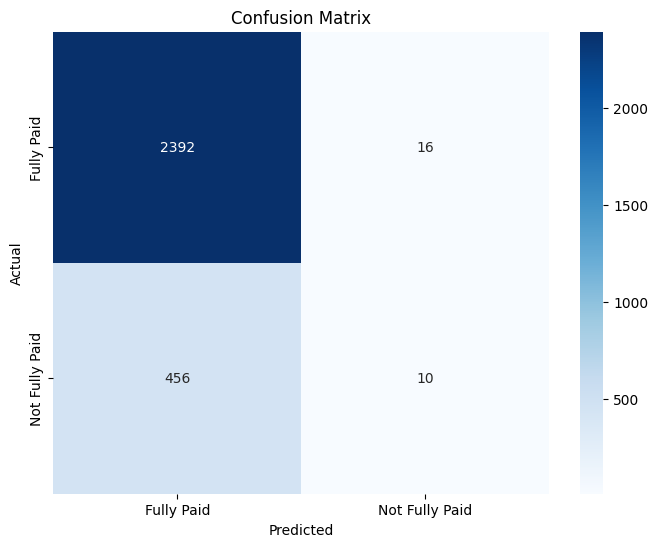

In [ ]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fully Paid', 'Not Fully Paid'], yticklabels=['Fully Paid', 'Not Fully Paid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Optional: Comparing predicctions with actual valuesina DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'predited': y_pred})
print(comparison_df.head())

      Actual  predited
8558       0         0
4629       0         0
1383       1         0
8142       0         0
1768       0         0


In [ ]:
# Analyze the distribution of the target variable
loan_status_counts = y_test.value_counts()
loan_status_percentage = y_test.value_counts(normalize=True) * 100

In [ ]:
print("loan Status Distribution:")
print(f"Fully Paid: {loan_status_counts[0]} ({loan_status_percentage[0]:.2f}%)")
print(f"Not Fully Paid: {loan_status_counts[1]} ({loan_status_percentage[1]:.2f}%)")

loan Status Distribution:
Fully Paid: 2408 (83.79%)
Not Fully Paid: 466 (16.21%)


In [ ]:
# Suggestions
print("\nSuggestion:")
if accuracy < 0.80:
    print("consider trying different model or hyperparameter tuning to improve accuracy.")
if conf_matrix[1, 1] < conf_matrix[1, 0]:
    print("The model might be strugging with predicting 'Not Fully Paid' loans. consider focusing on balancing the classes or using diferent")
if class_report['weighted avg']['f1-score'] < 0.70:
    print("The F1-score suggests there may be room for improvement in model performance. Investigate feature engineering or try other classification")


Suggestion:
The model might be strugging with predicting 'Not Fully Paid' loans. consider focusing on balancing the classes or using diferent
